In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/powerconsumption.csv'
data = pd.read_csv(file_path)

# Display dataset info and structure
data.info()
display(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert Datetime column to pandas datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%m/%d/%Y %H:%M')

# Extract time-based features
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Weekday'] = data['Datetime'].dt.weekday

# Select features and target
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Hour', 'Day', 'Month', 'Weekday']
target = 'PowerConsumption_Zone1'

X = data[features]
y = data[target]

# Split dataset into training, validation, and test sets
train_size = 0.7
val_size = 0.2
test_size = 0.1

n = len(data)
train_end = int(n * train_size)
val_end = train_end + int(n * val_size)

train_data = data.iloc[:train_end]
val_data = data.iloc[train_end:val_end]
test_data = data.iloc[val_end:]

# Normalize features
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[features])
scaled_val = scaler.transform(val_data[features])
scaled_test = scaler.transform(test_data[features])


In [ ]:
# Convert to sequences for PatchTST
seq_length = 96  # Adjust as needed

def create_sequences(data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length, :])  # Features
        y_seq.append(data[i + seq_length, 0])  # Target (First column)
    return np.array(X_seq), np.array(y_seq)

X_train, y_train = create_sequences(scaled_train, seq_length)
X_val, y_val = create_sequences(scaled_val, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)


In [ ]:
# Clone the official PatchTST repository
!rm -rf PatchTST
!git clone https://github.com/yuqinie98/PatchTST.git

# Install dependencies
# Install dependencies except for torch
!grep -v 'torch' PatchTST/PatchTST_supervised/requirements.txt | xargs -n 1 pip install

# Install the latest compatible version of PyTorch
!pip install torch torchvision torchaudio



Cloning into 'PatchTST'...
remote: Enumerating objects: 352, done.
remote: Total 352 (delta 0), reused 0 (delta 0), pack-reused 352 (from 1)
Receiving objects: 100% (352/352), 12.93 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (154/154), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sys, os

# Add PatchTST to system path
patchtst_path = os.path.abspath("PatchTST/PatchTST_supervised")
if patchtst_path not in sys.path:
    sys.path.append(patchtst_path)

# Add PatchTST layers path
layers_path = os.path.join(patchtst_path, "layers")
if layers_path not in sys.path:
    sys.path.append(layers_path)

print("✅ PatchTST paths added successfully!")


✅ PatchTST paths added successfully!


In [ ]:
# Import PatchTST model
from models.PatchTST import Model as PatchTST


In [ ]:
# Define required configurations for PatchTST
class Configs:
    def __init__(self):
        self.enc_in = len(features)  # Number of input features
        self.seq_len = seq_length  # Input sequence length
        self.pred_len = 24  # Prediction length
        self.d_model = 128
        self.n_heads = 4
        self.e_layers = 3
        self.d_ff = 256
        self.dropout = 0.1
        self.fc_dropout = 0.1
        self.head_dropout = 0.1
        self.learning_rate = 0.0005
        self.batch_size = 32
        self.num_epochs = 10
        self.individual = False
        self.patch_len = 16
        self.stride = 8
        self.padding_patch = "end"

        # ✅ Add missing attributes to fix AttributeError
        self.revin = True
        self.affine = False
        self.subtract_last = False
        self.decomposition = False  # ✅ Fix AttributeError
        self.kernel_size = 25  # ✅ Adjust as per model requirement

# ✅ Initialize Configs class
configs = Configs()

# ✅ Initialize PatchTST model without errors
patchtst_model = PatchTST(configs=configs, max_seq_len=seq_length)
print("✅ PatchTST Model Initialized Successfully!")



✅ PatchTST Model Initialized Successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to PyTorch tensors
train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
target_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1).to(device)

val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
val_target_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1).to(device)


In [ ]:
# Create DataLoader
train_loader = DataLoader(TensorDataset(train_tensor, target_tensor), batch_size=configs.batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(val_tensor, val_target_tensor), batch_size=configs.batch_size, shuffle=False)


In [ ]:
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(patchtst_model.parameters(), lr=configs.learning_rate)


In [ ]:
# Training loop
for epoch in range(configs.num_epochs):
    patchtst_model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = patchtst_model(batch_X)
        # Select the relevant prediction from the output
        # We are interested in output[:, 0, 0] which represents the prediction for the next time step for each sample in the batch
        # We compare it to the target batch_y
        loss = criterion(output[:, 0, 0], batch_y.squeeze())
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{configs.num_epochs}, Loss: {loss.item()}")

print("✅ PatchTST Model Training Completed!")



Epoch 1/10, Loss: 0.00048816180787980556
Epoch 2/10, Loss: 3.2700092560844496e-05
Epoch 3/10, Loss: 0.000894208496902138
Epoch 4/10, Loss: 0.0007855822332203388
Epoch 5/10, Loss: 0.0005838288343511522
Epoch 6/10, Loss: 7.377442670986056e-05
Epoch 7/10, Loss: 0.0025150724686682224
Epoch 8/10, Loss: 0.0013433304848149419
Epoch 9/10, Loss: 0.0011920679826289415
Epoch 10/10, Loss: 0.0002104768209392205
✅ PatchTST Model Training Completed!


In [ ]:
# Switch to evaluation mode
patchtst_model.eval()

# Convert test data to PyTorch tensors
test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
test_target_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1).to(device)

# Make predictions
with torch.no_grad():
    predictions = patchtst_model(test_tensor)
    predictions = predictions[:, 0, 0]

# Instead of expand_as, squeeze the target tensor to match dimensions
test_target_tensor = test_target_tensor.squeeze(1) # Removes the dimension of size 1

# Compute evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert tensors to numpy arrays
predictions_np = predictions.cpu().numpy()
test_target_np = test_target_tensor.cpu().numpy()

# Calculate metrics
mse = mean_squared_error(test_target_np, predictions_np)
rmse = mse ** 0.5
mae = mean_absolute_error(test_target_np, predictions_np)
r2 = r2_score(test_target_np, predictions_np)

print(f"✅ Model Evaluation Completed!")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R² Score: {r2:.6f}")

✅ Model Evaluation Completed!
MSE: 0.000234
RMSE: 0.015309
MAE: 0.011787
R² Score: 0.973096


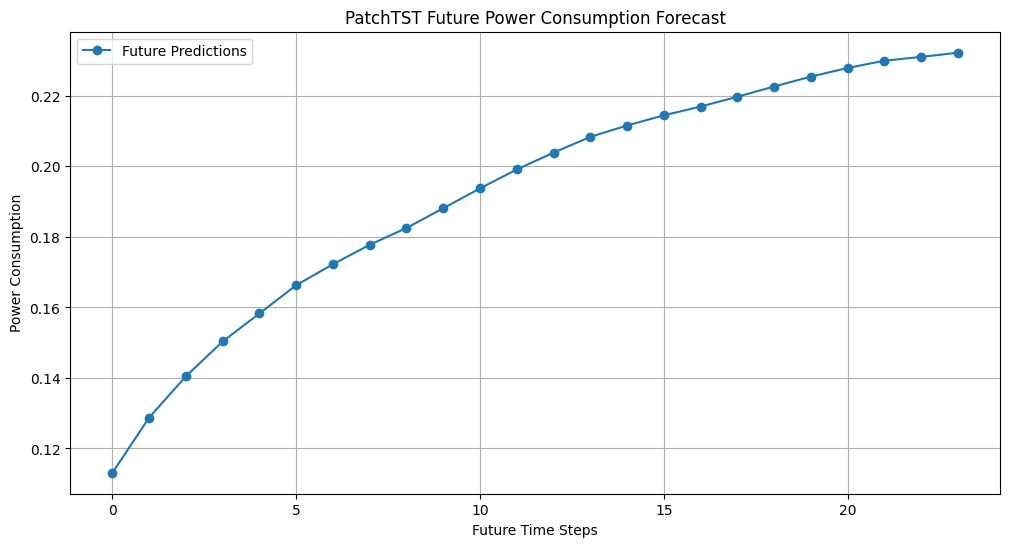

✅ Future Power Consumption Forecasting Completed!


In [ ]:
import matplotlib.pyplot as plt # Import matplotlib and assign alias

# Define the number of future time steps to predict
future_steps = 24  # Predict next 24 hours

# Take the last known sequence from test data
input_sequence = torch.tensor(X_test[-1:], dtype=torch.float32).to(device)

# Generate future predictions
patchtst_model.eval()
future_predictions = []

with torch.no_grad():
    for _ in range(future_steps):
        prediction = patchtst_model(input_sequence)  # Predict next step
        future_predictions.append(prediction[:, 0, 0].item())  # Store the first prediction value

        # Update input sequence by shifting window forward
        # Select only the first prediction from the output for concatenation
        prediction_to_cat = prediction[:, 0, :].unsqueeze(1)
        input_sequence = torch.cat((input_sequence[:, 1:, :], prediction_to_cat), dim=1)

# Convert predictions to numpy
future_predictions_np = np.array(future_predictions)

# Plot Future Predictions
plt.figure(figsize=(12, 6)) # Now plt is recognized
plt.plot(range(future_steps), future_predictions_np, marker="o", linestyle="-", label="Future Predictions")
plt.xlabel("Future Time Steps")
plt.ylabel("Power Consumption")
plt.title("PatchTST Future Power Consumption Forecast")
plt.legend()
plt.grid()
plt.show()

print("✅ Future Power Consumption Forecasting Completed!")

In [ ]:
import shap

# Use SHAP to explain PatchTST predictions
# The model patchtst_model should be the second argument
# Use a subset of the training data as background data
background_data = train_tensor[:100].cpu().numpy()  # Convert background data to numpy array

# ✅ Define a prediction function for SHAP
def model_predict(data):
    """Wrapper function for PatchTST model prediction."""
    data = torch.tensor(data, dtype=torch.float32).to(device)  # Convert data to tensor
    with torch.no_grad():
        output = patchtst_model(data)
        return output[:, 0, 0].cpu().numpy()  # Extract prediction and convert to numpy

# ✅ Pass the prediction function to the Explainer
# ✅ Instead of background_data, pass an empty list or None to the masker argument
explainer = shap.Explainer(model_predict, masker=shap.maskers.Independent(background_data))

# Explain

In [ ]:
import json

# Save trained model
torch.save(patchtst_model.state_dict(), "final_patchtst_model.pth")
print("✅ Final Model Saved Successfully!")

# Save configuration settings
config_dict = {key: value for key, value in configs.__dict__.items()}
with open("patchtst_config.json", "w") as f:
    json.dump(config_dict, f, indent=4)

print("✅ Model Configurations Saved Successfully!")


✅ Final Model Saved Successfully!
✅ Model Configurations Saved Successfully!
